In [1]:
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import itertools

This data was collected from the Kaggle SpaceNet dataset found at https://www.kaggle.com/datasets/razaimam45/spacenet-an-optimally-distributed-astronomy-data/data. The data contains instances of objects found in space such as Galaxies and Stars. The problem within the dataset is to classify celestial bodies based on images within the dataset. To clean the data some of the corrupted images had to be identified and removed from the set. 

In [2]:
#Load the dataset with images resized to 224x224 for the models
space_dataset_train, space_dataset_val = tf.keras.utils.image_dataset_from_directory("./data", image_size=(224,224), validation_split=0.25, subset="both", seed=77)

Found 11448 files belonging to 8 classes.
Using 8586 files for training.
Using 2862 files for validation.


In [3]:
#The data is comprised if a data tensor and labels tensor
space_dataset_train.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [4]:
#Separate the labels from the data
space_dataset_train_data = space_dataset_train.map(lambda x,y: x/255.0)
space_dataset_train_labels = space_dataset_train.map(lambda x,y: y)

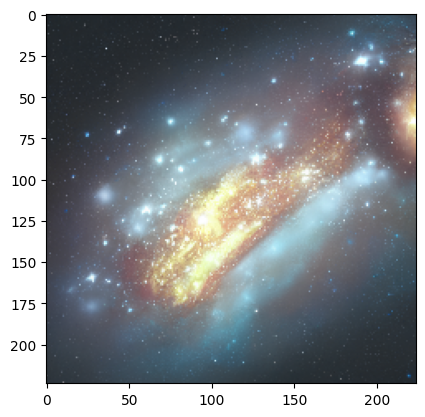

In [5]:
#Show a random image
pointer = random.randint(0, int((len(space_dataset_train_data)-1)/32))
batch_pointer = random.randint(0, 31)
random_sample = list(space_dataset_train_data.as_numpy_iterator())[pointer][batch_pointer]
plt.imshow(random_sample)

In [6]:
space_dataset_train_labels = list(space_dataset_train_labels.as_numpy_iterator())

(array([ 203.,  504.,  323.,    0., 1165., 1944.,    0.,  889., 1091.,
        2467.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

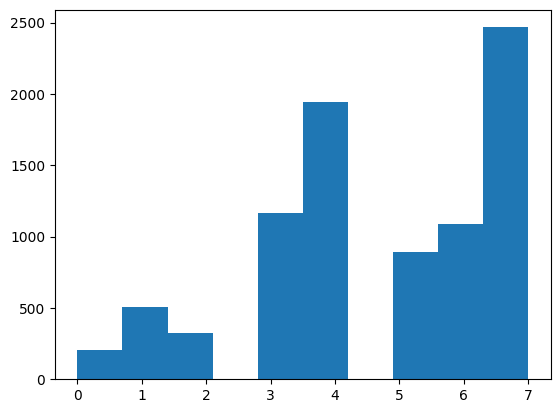

In [7]:
#Getting a distribution of the labels with 'Star' and 'Galaxy' having the most instances
plt.hist(list(itertools.chain(*space_dataset_train_labels)))

In [13]:
#The next step is to build models to classify the images. The first model is a VGG-11 model
VGG_model = keras.Sequential([
    keras.layers.InputLayer(shape=(224,224,3), batch_size=32),
    keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), activation='relu'),
    keras.layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(512, kernel_size=(3,3), strides=(1,1), activation='relu'),
    keras.layers.Conv2D(512, kernel_size=(3,3), strides=(1,1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(512, kernel_size=(3,3), strides=(1,1), activation='relu'),
    keras.layers.Conv2D(512, kernel_size=(3,3), strides=(1,1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='softmax')
], name="VGG-11")
VGG_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
VGG_model.summary()

Model: "VGG-11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_101 (Conv2D)             │ (32, 222, 222, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 111, 111, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (32, 109, 109, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (32, 54, 54, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (32, 52, 52, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (32, 50, 50, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (32, 25, 25, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (32, 23, 23, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (32, 21, 21, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (32, 10, 10, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (32, 8, 8, 512)        │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (32, 6, 6, 512)        │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (32, 3, 3, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 4608)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 32)               │       147,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (32, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 32)               │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (32, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 8)                │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,369,288 (35.74 MB)

 Trainable params: 9,369,288 (35.74 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
class InceptionLayer(keras.layers.Layer):
    def __init__(self, three_reduced, five_reduced, pool_size, channel_one, channel_three, channel_five):
        super().__init__()
        self.three_reduced = three_reduced
        self.five_reduced = five_reduced
        self.pool_size = pool_size
        self.channel_one = channel_one
        self.channel_three = channel_three
        self.channel_five = channel_five
        self.conv2d_one = keras.layers.Conv2D(filters=self.channel_one, kernel_size=(1,1), strides=(1,1), activation='relu', padding='same')
        self.conv2d_three = keras.layers.Conv2D(filters=self.channel_three, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same')
        self.conv2d_five = keras.layers.Conv2D(filters=self.channel_five, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same')
        self.conv2d_three_reduced = keras.layers.Conv2D(filters=self.three_reduced, kernel_size=(1,1), strides=(1,1), activation='relu', padding='same')
        self.conv2d_five_reduced = keras.layers.Conv2D(filters=self.five_reduced, kernel_size=(1,1), strides=(1,1), activation='relu', padding='same')
        self.conv2d_pool = keras.layers.Conv2D(filters=self.pool_size, kernel_size=(1,1), strides=(1,1), activation='relu', padding='same')
        self.max_pool = keras.layers.MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')
        
    def call(self, inputs):
        a = self.conv2d_one(inputs)
        b = self.conv2d_three_reduced(inputs)
        b = self.conv2d_three(b)
        c = self.conv2d_five_reduced(inputs)
        c = self.conv2d_five(c)
        d = self.max_pool(inputs)
        d = self.conv2d_pool(d)
        return keras.layers.concatenate([a, b, c, d], axis=-1)
    

In [32]:
#The next model is a GoogLeNet model
googlenet_inputs = keras.layers.Input(shape=(224, 224, 3), batch_size=32)
x = keras.layers.Conv2D(64, kernel_size=(7,7), strides=(2,2), activation='relu', padding='same')(googlenet_inputs)
x = keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = keras.layers.Conv2D(64, kernel_size=(1,1), strides=(1,1), activation='relu', padding='same')(x)
x = keras.layers.Conv2D(192, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = InceptionLayer(96, 16, 32, 64, 128, 32)(x)
x = InceptionLayer(128, 32, 64, 128, 192, 96)(x)
x = keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = InceptionLayer(96, 16, 64, 192, 208, 48)(x)
x = InceptionLayer(112, 24, 64, 160, 224, 64)(x)
x = InceptionLayer(128, 24, 64, 128, 256, 64)(x)
x = InceptionLayer(144, 32, 64, 112, 288, 64)(x)
x = InceptionLayer(160, 32, 128, 256, 320, 128)(x)
x = keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
x = InceptionLayer(160, 32, 128, 256, 320, 128)(x)
x = InceptionLayer(192, 48, 128, 384, 384, 128)(x)
x = keras.layers.GlobalAvgPool2D()(x)
x = keras.layers.Dropout(0.4)(x)
outputs = keras.layers.Dense(8, activation='softmax')(x)

GoogLeNet_model = keras.models.Model(inputs=googlenet_inputs,outputs=outputs, name='GoogLeNet_Model')
GoogLeNet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
GoogLeNet_model.summary()


Model: "GoogLeNet_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_566 (Conv2D)             │ (32, 112, 112, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_117               │ (32, 56, 56, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_567 (Conv2D)             │ (32, 56, 56, 64)       │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_568 (Conv2D)             │ (32, 56, 56, 192)      │       110,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_118               │ (32, 28, 28, 192)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_layer_57              │ (32, 28, 28, 256)      │       163,696 │
│ (InceptionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_layer_58              │ (32, 28, 28, 480)      │       388,736 │
│ (InceptionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_121               │ (32, 14, 14, 480)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_layer_59              │ (32, 14, 14, 512)      │       376,176 │
│ (InceptionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_layer_60              │ (32, 14, 14, 512)      │       449,160 │
│ (InceptionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_layer_61              │ (32, 14, 14, 512)      │       510,104 │
│ (InceptionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_layer_62              │ (32, 14, 14, 528)      │       605,376 │
│ (InceptionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_layer_63              │ (32, 14, 14, 832)      │       868,352 │
│ (InceptionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_127               │ (32, 7, 7, 832)        │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_layer_64              │ (32, 7, 7, 832)        │     1,043,456 │
│ (InceptionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_layer_65              │ (32, 7, 7, 1024)       │     1,444,080 │
│ (InceptionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (32, 1024)             │             0 │
│ (GlobalAveragePooling2D)        │                        │             

 Total params: 5,981,752 (22.82 MB)

 Trainable params: 5,981,752 (22.82 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, top_stride, channels, pad_channels):
        super().__init__()
        self.top_stride = top_stride
        self.channels = channels
        self.pad_channels = pad_channels
        self.conv1 = keras.layers.Conv2D(filters=self.channels, kernel_size=(3,3), strides=(self.top_stride, self.top_stride), padding='same')
        self.conv2 = keras.layers.Conv2D(filters=self.channels, kernel_size=(3,3), strides=(1,1), padding='same')
        self.conv3 = keras.layers.Conv2D(filters=self.channels, kernel_size=(1,1), strides=(self.top_stride, self.top_stride))
        self.bn1 = keras.layers.BatchNormalization()
        self.bn2 = keras.layers.BatchNormalization()
        self.add = keras.layers.Add()
        self.relu1 = keras.layers.ReLU()
        self.relu2 = keras.layers.ReLU()
        
    def call(self, inputs):
        d = inputs
        c = self.conv1(inputs)
        c = self.bn1(c)
        c = self.relu1(c)
        c = self.conv2(c)
        c = self.bn2(c)
        if self.pad_channels:
            d = self.conv3(d)
        e = self.add([d, c])
        return self.relu2(e)
    def build(self, input_shape):
        super().build(input_shape)
        

In [49]:
#The last model is a ResNet-34 Model
resnet_inputs = keras.layers.Input(shape=(224, 224, 3), batch_size=32)
r = keras.layers.Conv2D(64, kernel_size=(7,7), strides=(2,2), padding='same', activation='relu')(resnet_inputs)
r = keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(r)
r = ResidualBlock(1, 64, False)(r)
r = ResidualBlock(1, 64, False)(r)
r = ResidualBlock(1, 64, False)(r)
r = ResidualBlock(2, 128, True)(r)
r = ResidualBlock(1, 128, False)(r)
r = ResidualBlock(1, 128, False)(r)
r = ResidualBlock(1, 128, False)(r)
r = ResidualBlock(2, 256, True)(r)
r = ResidualBlock(1, 256, False)(r)
r = ResidualBlock(1, 256, False)(r)
r = ResidualBlock(1, 256, False)(r)
r = ResidualBlock(1, 256, False)(r)
r = ResidualBlock(1, 256, False)(r)
r = ResidualBlock(2, 512, True)(r)
r = ResidualBlock(1, 512, False)(r)
r = ResidualBlock(1, 512, False)(r)
r = keras.layers.GlobalAvgPool2D()(r)
resnet_outputs = keras.layers.Dense(8, activation='softmax')(r)

ResidualNetModel = keras.models.Model(inputs=resnet_inputs, outputs=resnet_outputs, name='ResidualNetModel')
ResidualNetModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ResidualNetModel.summary()

Model: "ResidualNetModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_966 (Conv2D)             │ (32, 112, 112, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_137               │ (32, 56, 56, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_144              │ (32, 56, 56, 64)       │        74,368 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_145              │ (32, 56, 56, 64)       │        74,368 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_146              │ (32, 56, 56, 64)       │        74,368 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_147              │ (32, 28, 28, 128)      │       230,784 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_148              │ (32, 28, 28, 128)      │       296,192 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_149              │ (32, 28, 28, 128)      │       296,192 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_150              │ (32, 28, 28, 128)      │       296,192 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_151              │ (32, 14, 14, 256)      │       920,320 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_152              │ (32, 14, 14, 256)      │     1,182,208 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_153              │ (32, 14, 14, 256)      │     1,182,208 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_154              │ (32, 14, 14, 256)      │     1,182,208 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_155              │ (32, 14, 14, 256)      │     1,182,208 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_156              │ (32, 14, 14, 256)      │     1,182,208 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_157              │ (32, 7, 7, 512)        │     3,675,648 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 21,310,472 (81.29 MB)

 Trainable params: 21,295,368 (81.24 MB)

 Non-trainable params: 15,104 (59.00 KB)

In [ ]:
#Training each model sequentially for 5 epochs
space_dataset_train = space_dataset_train.map(lambda x,y: (x/255.0, y))
VGG_model.fit(space_dataset_train, epochs=5)

Epoch 1/5
269/269 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.2924 - loss: 1.8454
Epoch 2/5
269/269 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.2933 - loss: 1.8494
Epoch 3/5
269/269 ━━━━━━━━━━━━━━━━━━━━ 580s 2s/step - accuracy: 0.2942 - loss: 1.8429
Epoch 4/5
269/269 ━━━━━━━━━━━━━━━━━━━━ 729s 3s/step - accuracy: 0.2912 - loss: 1.8478
Epoch 5/5
 77/269 ━━━━━━━━━━━━━━━━━━━━ 10:38 3s/step - accuracy: 0.2996 - loss: 1.8404

In [35]:
GoogLeNet_model.fit(space_dataset_train, epochs=5)

Epoch 1/5
269/269 ━━━━━━━━━━━━━━━━━━━━ 131s 461ms/step - accuracy: 0.2659 - loss: 1.9245
Epoch 2/5
269/269 ━━━━━━━━━━━━━━━━━━━━ 131s 485ms/step - accuracy: 0.3500 - loss: 1.6339
Epoch 3/5
269/269 ━━━━━━━━━━━━━━━━━━━━ 130s 484ms/step - accuracy: 0.4163 - loss: 1.4505
Epoch 4/5
269/269 ━━━━━━━━━━━━━━━━━━━━ 132s 491ms/step - accuracy: 0.4616 - loss: 1.3686
Epoch 5/5
269/269 ━━━━━━━━━━━━━━━━━━━━ 219s 813ms/step - accuracy: 0.4855 - loss: 1.3328


In [ ]:
ResidualNetModel.fit(space_dataset_train, epochs=5)

In [ ]:
VGG_model.predict(space_dataset_val)
GoogLeNet_model.predict(space_dataset_val)
ResidualNetModel.predict(space_dataset_val)

In conclusion, the GoogleNet model performed the best while still being able to be trained in a reasonable amount of time.
The VGG model took a substantial amount to train even on 5 epochs because it utilizes 9 million parameters. The GoogleNet model is only 5 million while ResNet-34 had 21 million parameters. In terms of next steps I would want to explore other architectures that may be more optimized than ResNet or VGG.

References:
1. SpaceNet: A Comprehensive Astronomical Dataset https://www.kaggle.com/datasets/razaimam45/spacenet-an-optimally-distributed-astronomy-data/data
2. Very Deep Convolutional Networks for Large-Scale Image Recognition https://arxiv.org/abs/1409.1556
3. Going Deeper with Convolutions https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Szegedy_Going_Deeper_With_2015_CVPR_paper.pdf
4. Deep Residual Learning for Image Recognition https://arxiv.org/abs/1512.03385